## Assignment - 17 Support Vector Machines (Salary Data)

## Import Necessary Libraries

In [1]:
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
train = pd.read_csv(r'D:\Downloads\SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test = pd.read_csv(r'D:\Downloads\SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Data Understanding

In [4]:
train.shape

(30161, 14)

In [5]:
test.shape

(15060, 14)

In [6]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


## Model Preparation

In [10]:
le = LabelEncoder()
train['Salary'] = le.fit_transform(train['Salary'])
test['Salary'] = le.fit_transform(test['Salary'])

In [11]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [12]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [13]:
train_data = train.drop(['workclass','education','maritalstatus','occupation','relationship','race','sex','native'],axis=1,inplace=False)
train_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0
...,...,...,...,...,...,...
30156,27,12,0,0,38,0
30157,40,9,0,0,40,1
30158,58,9,0,0,40,0
30159,22,9,0,0,20,0


In [14]:
test_data = test.drop(['workclass','education','maritalstatus','occupation','relationship','race','sex','native'],axis=1,inplace=False)
test_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,0,0,40,0
1,38,9,0,0,50,0
2,28,12,0,0,40,1
3,44,10,7688,0,40,1
4,34,6,0,0,30,0
...,...,...,...,...,...,...
15055,33,13,0,0,40,0
15056,39,13,0,0,36,0
15057,38,13,0,0,50,0
15058,44,13,5455,0,40,0


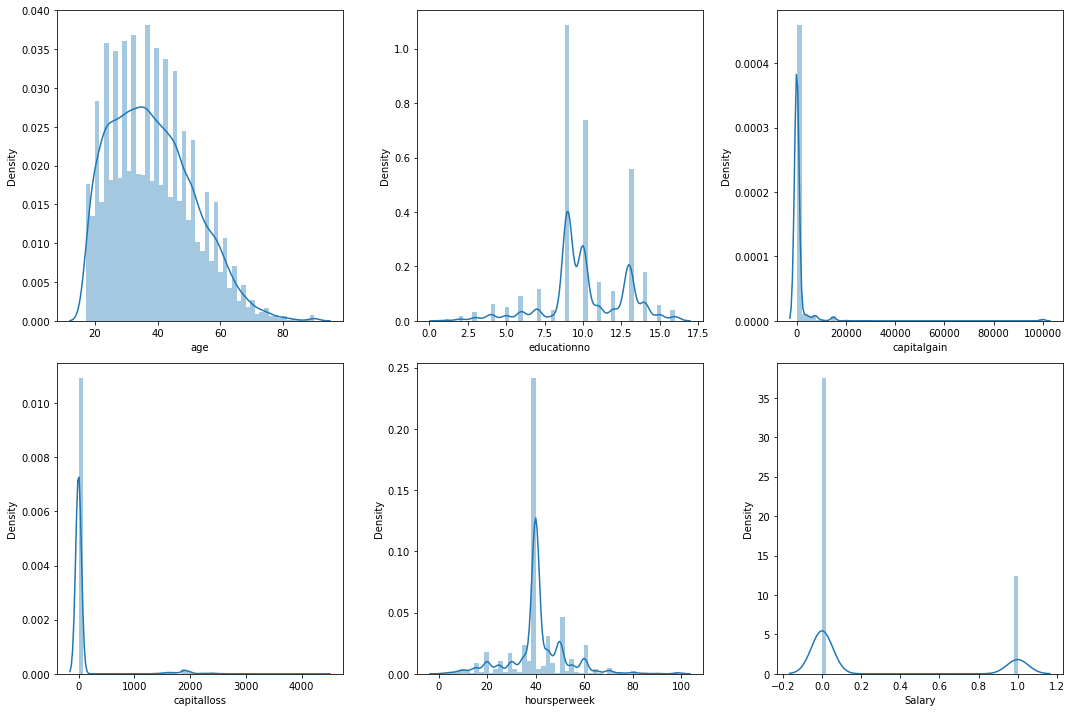

In [15]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.distplot(train_data.age, ax=ax[0,0])
sns.distplot(train_data.educationno, ax=ax[0,1])
sns.distplot(train_data.capitalgain, ax=ax[0,2])
sns.distplot(train_data.capitalloss, ax=ax[1,0])
sns.distplot(train_data.hoursperweek, ax=ax[1,1])
sns.distplot(train_data.Salary, ax=ax[1,2])
plt.tight_layout()
plt.show()

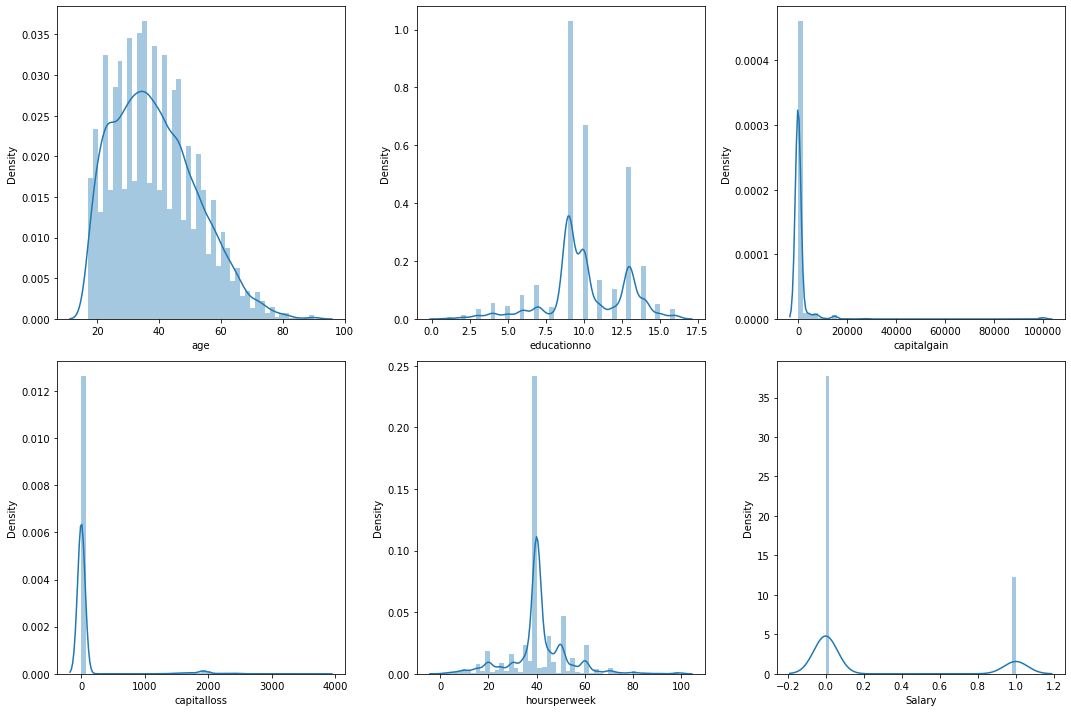

In [16]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.distplot(test_data.age, ax=ax[0,0])
sns.distplot(test_data.educationno, ax=ax[0,1])
sns.distplot(test_data.capitalgain, ax=ax[0,2])
sns.distplot(test_data.capitalloss, ax=ax[1,0])
sns.distplot(test_data.hoursperweek, ax=ax[1,1])
sns.distplot(test_data.Salary, ax=ax[1,2])
plt.tight_layout()
plt.show()

## Model Preparation

In [17]:
x_train = train_data.drop(labels= 'Salary', axis = 1)
y_train = train_data[['Salary']]

In [18]:
x_test = test_data.drop(labels= 'Salary', axis = 1)
y_test = test_data[['Salary']]

In [19]:
x_train

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
30156,27,12,0,0,38
30157,40,9,0,0,40
30158,58,9,0,0,40
30159,22,9,0,0,20


In [20]:
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [21]:
x_test

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
15055,33,13,0,0,40
15056,39,13,0,0,36
15057,38,13,0,0,50
15058,44,13,5455,0,40


In [22]:
y_test

,Salary
0,0
1,0
2,1
3,1
4,0
...,...
15055,0
15056,0
15057,0
15058,0


## Model Building // Model Evaluation

### Polynomial Kernal

In [23]:
select_model = SVC(kernel = 'poly') 

In [24]:
select_model.fit(x_train,y_train)

SVC(kernel='poly')

In [25]:
y_pred=select_model.predict(x_test)

In [26]:
%%time
print('Accuracy Score : ',accuracy_score(y_test,y_pred).round(4))
print('Precision score : ',precision_score(y_test,y_pred).round(4))
print('Recall Score : ',recall_score(y_test,y_pred).round(4))
print('Confusion Matrix :\n' ,confusion_matrix(y_test,y_pred))

Accuracy Score :  0.7795
Precision score :  0.9897
Recall Score :  0.1038
Confusion Matrix :
 [[11356     4]
 [ 3316   384]]
CPU times: total: 62.5 ms
Wall time: 36.4 ms


### Radial Kernal

In [27]:
select_model1 = SVC(kernel = 'rbf')

In [28]:
select_model1.fit(x_train,y_train)

SVC()

In [29]:
y_pred1=select_model1.predict(x_test)

In [30]:
%%time
print('Accuracy Score : ',accuracy_score(y_test,y_pred1).round(4))
print('Precision score : ',precision_score(y_test,y_pred1).round(4))
print('Recall Score : ',recall_score(y_test,y_pred1).round(4))
print('Confusion Matrix :\n' ,confusion_matrix(y_test,y_pred1))

Accuracy Score :  0.7964
Precision score :  0.7331
Recall Score :  0.2695
Confusion Matrix :
 [[10997   363]
 [ 2703   997]]
CPU times: total: 46.9 ms
Wall time: 38.6 ms
